In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Movies_(Netflix).csv', lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.size

88443

In [5]:
df.shape

(9827, 9)

In [6]:
(df.describe()).round(2)

,Popularity,Vote_Count,Vote_Average
count,9827.00,9827.00,9827.00
mean,40.33,1392.81,6.44
std,108.87,2611.21,1.13
min,13.35,0.00,0.00
25%,16.13,146.00,5.90
50%,21.20,444.00,6.50
75%,35.19,1376.00,7.10
max,5083.95,31077.00,10.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


 From this info we can see that there are no NaNs secondly there are columns such as Post_Url, Original_Language and Overview which is not needed here and lastly Release_Date needed to be casted in date time following the extraction of year value.

### Exploring Genre column

In [8]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

Genres are seperated by commas following white spaces

### check for duplicate rows

In [9]:
df.duplicated().sum()

np.int64(0)

In [ ]:
  Exploration Summary
  • we have a dataframe consisting of 9827 rows and 9 columns.
  • our dataset looks a bit tidy with no NaNs nor duplicated values.
  • Release_Date column needs to be casted into date time and to extract only the
  • Overview, Original_Languege and Poster-Url wouldn't be so useful during analys
  • there is noticable outliers in Popularity column
  • Vote_Average bettter be categorised for proper analysis.
  • Genre column has comma saperated values and white spaces that needs to be hand

# Data cleaning

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


casting Release Date into datetime format and extracting year

In [11]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])

In [12]:
print(df["Release_Date"].dtype)

datetime64[ns]


In [13]:
df["Release_Date"] = df["Release_Date"].dt.year

In [14]:
df["Release_Date"].dtype

dtype('int32')

droping irrelevent columns

In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [16]:
cols = ["Overview","Original_Language","Poster_Url"]

In [17]:
df.drop(cols,axis = 1,inplace = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [18]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

spliting genres into list for better exploration

In [19]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


casting columns into category

In [21]:
df["Genre"] = df["Genre"].astype("category")

In [22]:
df["Genre"].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(1)
memory usage: 932.8+ KB


In [24]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average      74
Genre             19
dtype: int64

In [25]:
df.shape

(25793, 6)

now our dataset is cleaned,hence we are left with 6 columns and 25793 rows ready for exploration and visualization

## Q. What is the most frequent genre in the database

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [27]:
df["Genre"].value_counts().sort_values(ascending = False).head(10)

Genre
Drama        3744
Comedy       3031
Action       2686
Thriller     2488
Adventure    1853
Romance      1476
Horror       1470
Animation    1439
Family       1414
Fantasy      1308
Name: count, dtype: int64

In [28]:
ax =   df["Genre"].value_counts().sort_values(ascending = False).head(10).reset_index()
ax.columns = ["Genres","Counts"]

In [29]:
ax

,Genres,Counts
0,Drama,3744
1,Comedy,3031
2,Action,2686
3,Thriller,2488
4,Adventure,1853
5,Romance,1476
6,Horror,1470
7,Animation,1439
8,Family,1414
9,Fantasy,1308


In [30]:
ax = df["Genre"].value_counts().head(10)

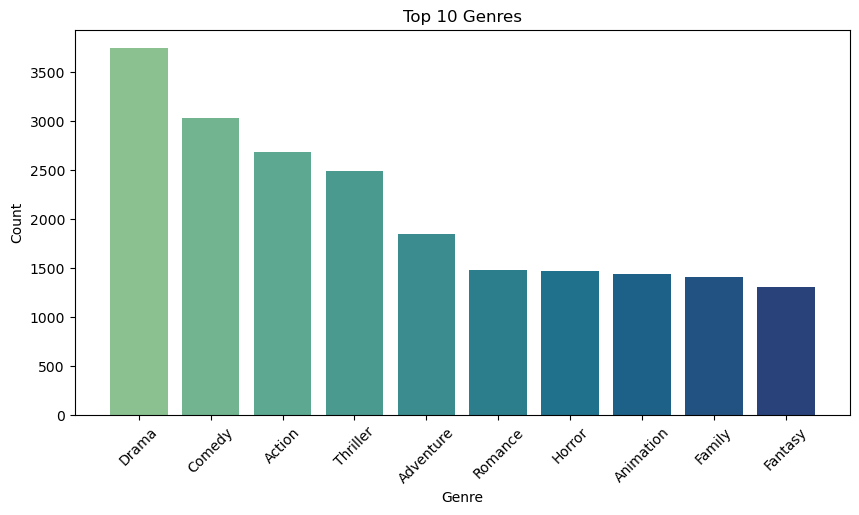

In [31]:
ax = df["Genre"].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
colors = sns.color_palette("crest", len(ax))
plt.bar(ax.index, ax.values, color=colors)
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Q.What Genre has highest votes?

In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [33]:
genre_avg = (df.groupby("Genre", observed=True)["Vote_Average"].max().sort_values(ascending=False).reset_index())

In [34]:
genre_avg.columns = ["Genre","Vote_Average"]

<Axes: xlabel='Genre', ylabel='Vote_Average'>

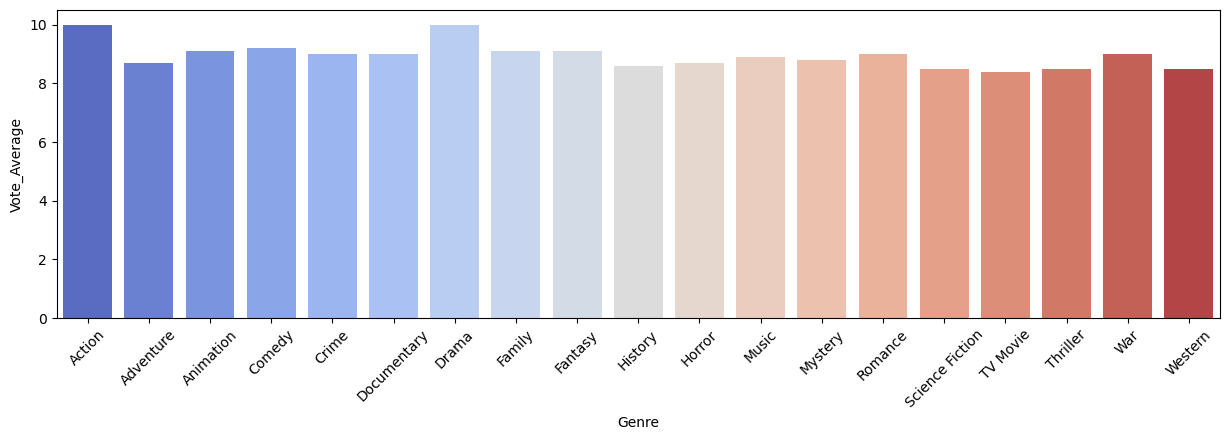

In [35]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 45)
sns.barplot(data = genre_avg,x = "Genre",y = "Vote_Average",dodge = False, hue = "Genre",legend = False, palette = "coolwarm")

## Q.What movies got highest popularity and it's Genre?

In [36]:
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


## Q.What movies have lowest popularity and its Genre?

In [37]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


## Q.What year have lowest filmmed movies?

In [38]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [39]:
ax = df["Release_Date"].value_counts().sort_values().head(10).reset_index()

In [40]:
ax.columns = ["Release_Date","Count"]

In [41]:
ax = ax.sort_values(by = "Count",ascending = True)

In [42]:
ax

,Release_Date,Count
0,1930,2
1,1925,2
2,1929,2
3,1902,3
4,2024,4
5,1920,4
6,1921,5
7,1936,5
8,1945,5
9,1922,5


In [46]:
ax.columns = ["Release_Date", "Count"]

In [47]:
ax = ax.sort_values(by="Count", ascending=False)

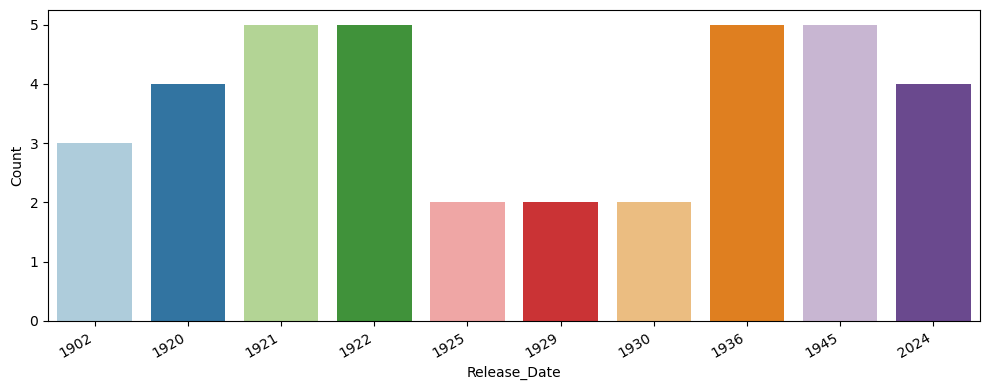

In [48]:
plt.figure(figsize=(10,4))
sns.barplot(data=ax, x="Release_Date", y="Count", hue="Release_Date", dodge=False, legend=False, palette="Paired")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

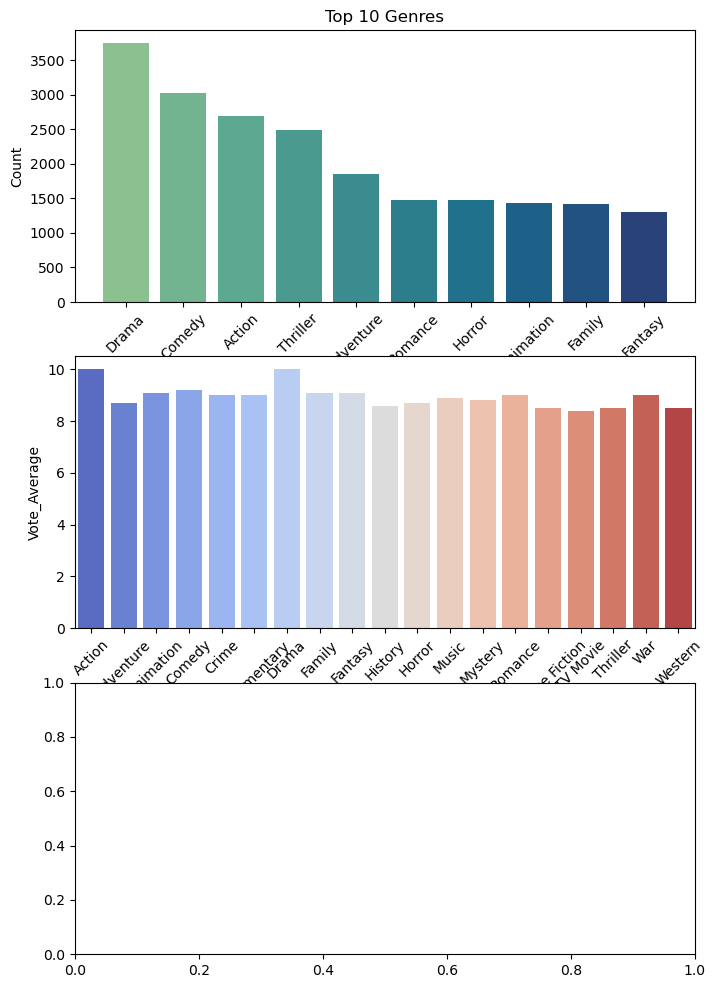

In [60]:
plt.figure(figsize = (8,12))
           
ax = df["Genre"].value_counts().sort_values(ascending=False).head(10)
plt.subplot(3,1,1)
colors = sns.color_palette("crest", len(ax))
plt.bar(ax.index, ax.values, color=colors)
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)


plt.subplot(3,1,2)
genre_avg = (df.groupby("Genre", observed=True)["Vote_Average"].max().sort_values(ascending=False).reset_index())
genre_avg.columns = ["Genre","Vote_Average"]
plt.xticks(rotation = 45)
sns.barplot(data = genre_avg,x = "Genre",y = "Vote_Average",dodge = False, hue = "Genre",legend = False, palette = "coolwarm")

plt.subplot(3,1,3)
ax = df["Release_Date"].value_counts().sort_values().head(10).reset_index()

ax.columns = ["Release_Date", "Count"]
ax = ax.sort_values(by="Count", ascending=False)
sns.barplot(data=ax, x="Release_Date", y="Count", hue="Release_Date", dodge=False, legend=False, palette="Paired")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

KeyError: 'Release_Date'

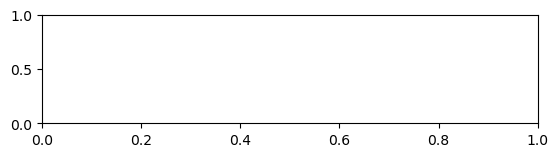

In [56]:
plt.subplot(3, 1, 1)
colors = sns.color_palette("crest", len(ax))
plt.bar(ax["Release_Date"], ax["Count"], color=colors)
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Subplot 2
plt.subplot(3, 1, 2)
plt.xticks(rotation=45)
sns.barplot(
    data=genre_avg,
    x="Genre",
    y="Vote_Average",
    dodge=False,
    hue="Genre",
    legend=False,
    palette="coolwarm"
)

# Subplot 3
plt.subplot(3, 1, 3)
sns.barplot(
    data=ax,
    x="Release_Date",
    y="Count",
    hue="Release_Date",
    dodge=False,
    legend=False,
    palette="Paired"
)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

## Netflix data analysis summary
#### Drama and Comedy are the most common genres, showing their strong audience appeal.
#### Action and Drama have the highest average ratings, reflecting consistent viewer satisfaction.
#### Movies span from early classics to recent releases, highlighting a wide timeline of film production.